In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/home/omokhtar/anaconda3/envs/dl/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data_relax={'min':[],'max':[],'mean':[],'std':[],'median':[]}
data_nmr = {'min':[],'max':[],'mean':[],'std':[],'median':[]}

# Function to calculate statistics and update the dictionaries
def update_statistics(data, scores):
    data['min'].append(np.min(scores))
    data['max'].append(np.max(scores))
    data['mean'].append(np.mean(scores))
    data['std'].append(np.std(scores))
    data['median'].append(np.median(scores))

# Reading and processing the file
with open("mmscores.txt", "r") as file:
    lines = file.readlines()
    for i in range(0, len(lines)):
        try:
            if 'relax' in lines[i]:
                score= list(map(lambda x: float(x),lines[i+1][1:-2].split(', ')))
                update_statistics(data_relax, score)
            elif 'NMR' in lines[i]:
                score= list(map(lambda x: float(x),lines[i+1][1:-2].split(', ')))
                update_statistics(data_nmr, score)
        except:
            print (lines[i+1])
print (len(data_nmr['min']),len(data_relax['min']))

1285 1285


In [3]:
# Convert dictionaries to DataFrames for easier plotting
df_relax = pd.DataFrame(data_relax)
df_relax['Type'] = 'Relax'
df_nmr = pd.DataFrame(data_nmr)
df_nmr['Type'] = 'NMR'

# Combine the two DataFrames
df_combined = pd.concat([df_relax, df_nmr], ignore_index=True)
np.unique(list(df_combined.Type))

array(['NMR', 'Relax'], dtype='<U5')

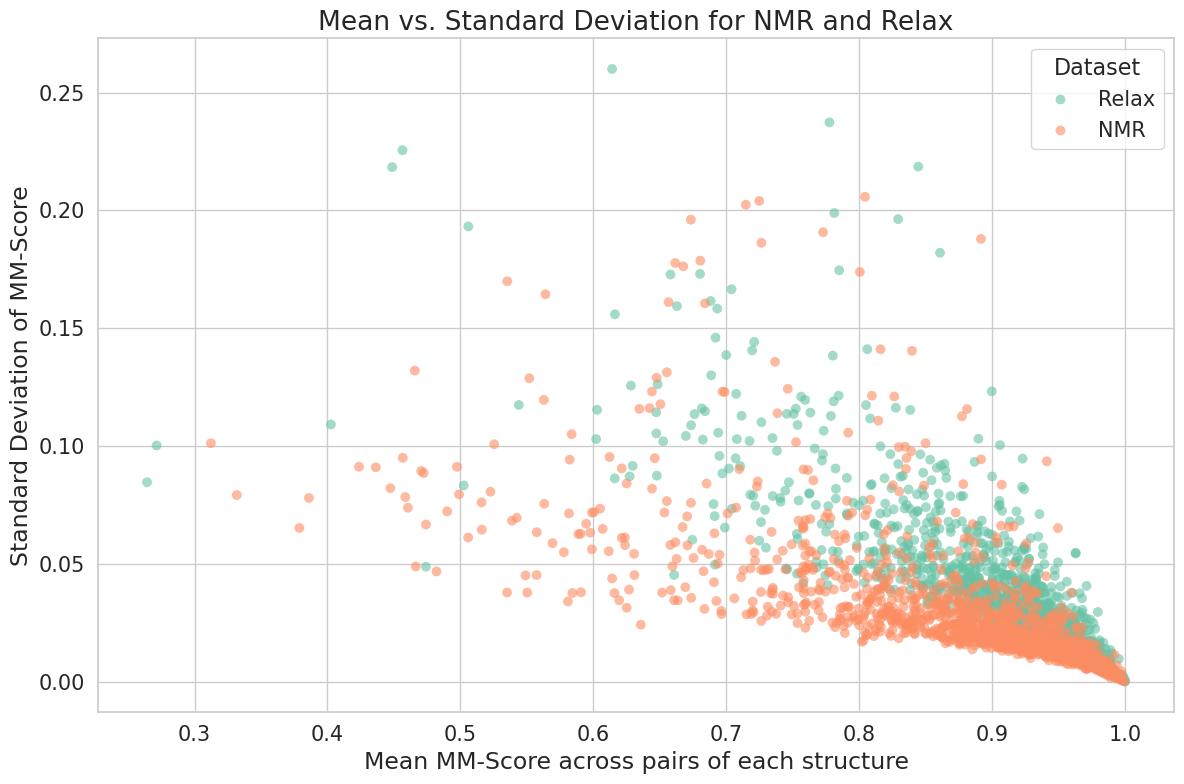

In [4]:
# Set the overall aesthetics for the plot
sns.set(style="whitegrid")

# Create the scatter plot with adjusted aesthetics
plt.figure(figsize=(12, 8))
sns.scatterplot(x='mean', y='std', hue='Type', data=df_combined, alpha=0.6, edgecolor='none', s=50, palette='Set2')

# Improve the readability of the plot
plt.title('Mean vs. Standard Deviation for NMR and Relax', fontsize=19)
plt.xlabel('Mean MM-Score across pairs of each structure', fontsize=17)
plt.ylabel('Standard Deviation of MM-Score', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Adjust the legend to not overlap with data
plt.legend(title='Dataset', title_fontsize='16', fontsize='15', loc='upper right')

# Show the plot with a tight layout to ensure everything fits without overlap
plt.tight_layout()
plt.show()

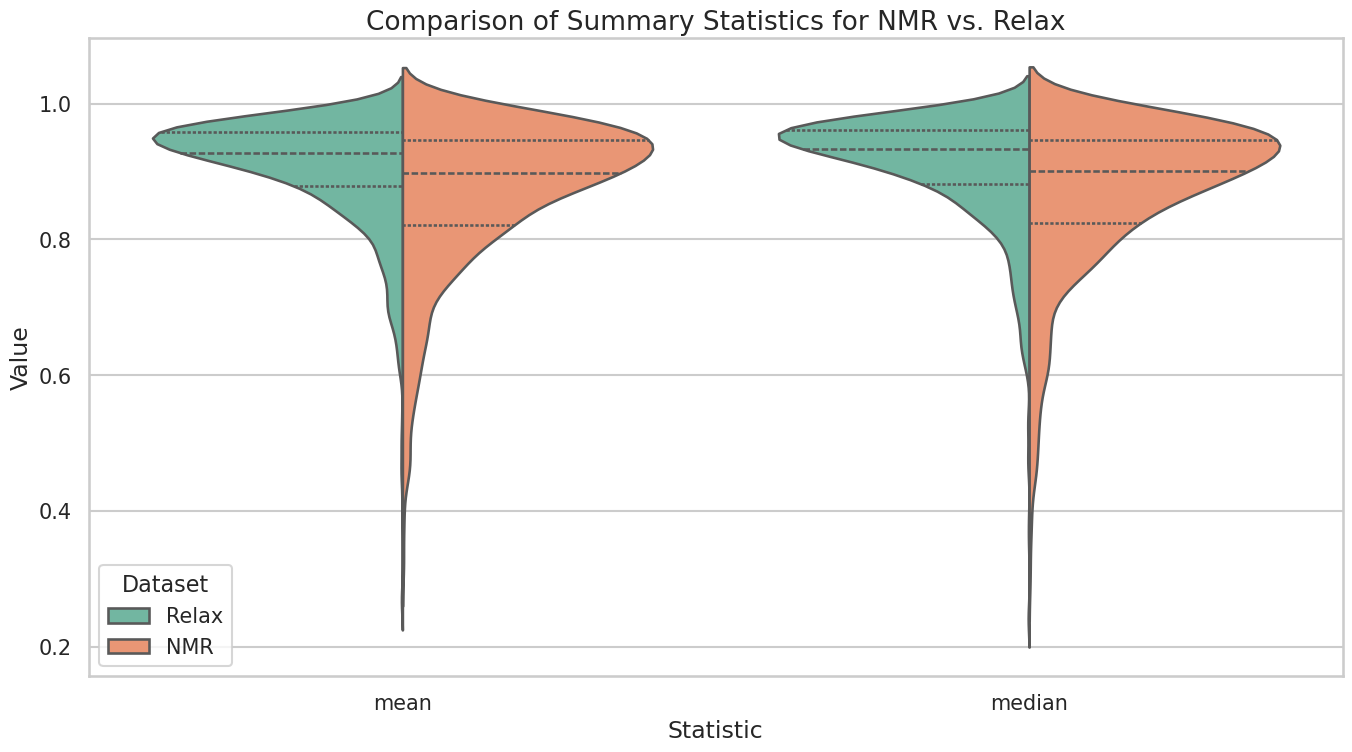

In [8]:
# Convert dictionaries into a DataFrame for easier plotting, with a type column distinguishing between NMR and Relax
df_stats = pd.DataFrame()

for stat in ['mean', 'median']:
    for dataset_type in ['Relax', 'NMR']:
        if dataset_type == 'NMR':
            temp_df = pd.DataFrame(data_nmr[stat], columns=[stat])
        else:
            temp_df = pd.DataFrame(data_relax[stat], columns=[stat])
        temp_df['Type'] = dataset_type
        temp_df['Statistic'] = stat
        df_stats = pd.concat([df_stats, temp_df])

# Melt the DataFrame for easier plotting with seaborn
df_melted = df_stats.melt(id_vars=['Type', 'Statistic'], var_name='Metric', value_name='Value')

sns.set_context('talk', font_scale=1.25)

# Set the overall size of the figure to widescreen format
plt.figure(figsize=(14, 8))

# Create the violin plot with adjusted style
ax = sns.violinplot(x='Statistic', y='Value', hue='Type', data=df_melted, split=True,
                    inner='quartile', palette='Set2')

# Set the font size for the labels and title
ax.set_xlabel('Statistic', fontsize=17)
ax.set_ylabel('Value', fontsize=17)
ax.set_title('Comparison of Summary Statistics for NMR vs. Relax', fontsize=19)

# Format the legend
ax.legend(title='Dataset', title_fontsize='16', fontsize='15', loc='best')

# Adjust the xtick and ytick labels
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Add grid lines for better readability, only horizontal since it's a violin plot
ax.yaxis.grid(True)

# Show the plot with a tight layout to ensure everything fits well
plt.tight_layout()
plt.show()

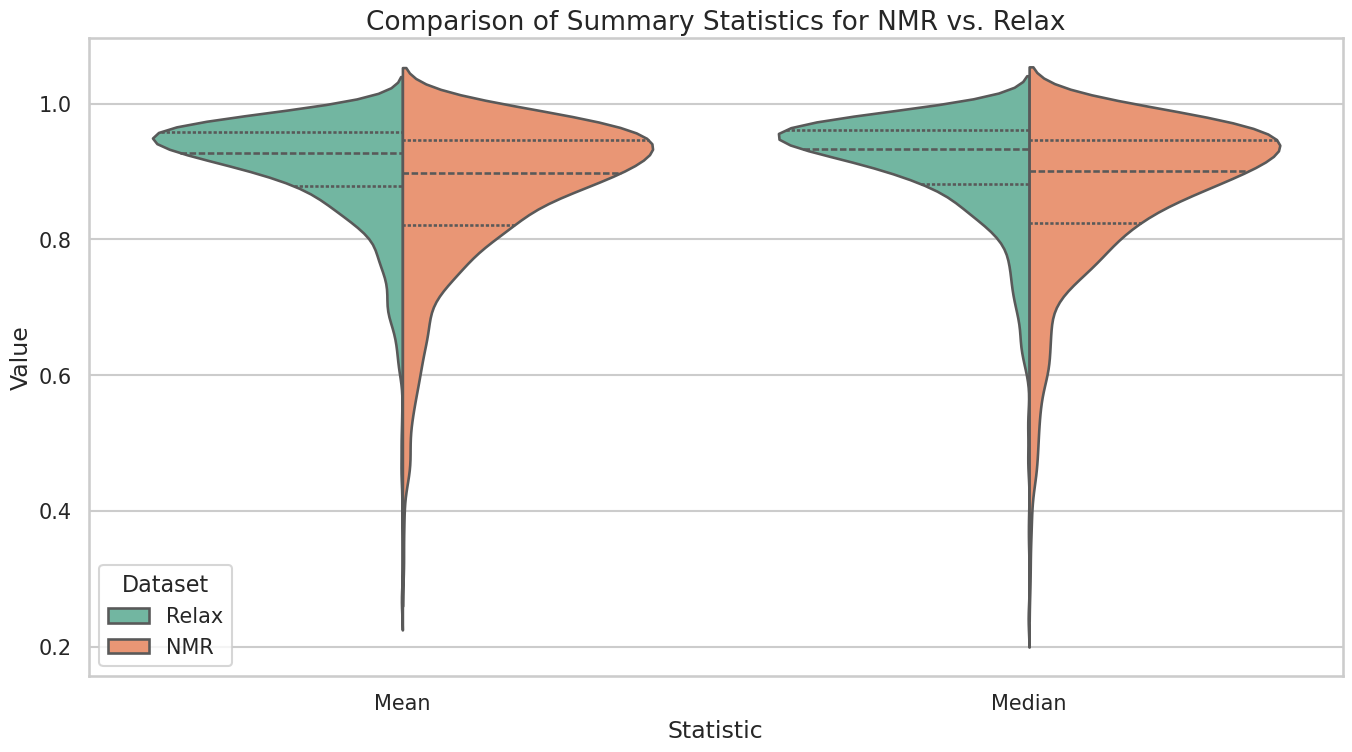

In [20]:
means_relax=df_stats[(df_stats['Type']=='Relax') & (df_stats['Statistic']=='mean')]['mean']
medians_relax=df_stats[(df_stats['Type']=='Relax') & (df_stats['Statistic']=='median')]['median']
means_nmr=df_stats[(df_stats['Type']=='NMR') & (df_stats['Statistic']=='mean')]['mean']
medians_nmr=df_stats[(df_stats['Type']=='NMR') & (df_stats['Statistic']=='median')]['median']

# Combining mean values for relax and NMR into one category, and median values into another
data_adjusted = pd.DataFrame({
    'Value': np.concatenate([means_relax, means_nmr, medians_relax, medians_nmr]),
    'Metric': ['Mean']*len(means_relax) + ['Mean']*len(means_nmr) + 
              ['Median']*len(medians_relax) + ['Median']*len(medians_nmr),
    'Type': ['Relax']*len(means_relax) + ['NMR']*len(means_nmr) + 
            ['Relax']*len(medians_relax) + ['NMR']*len(medians_nmr)
})




sns.set_context('talk', font_scale=1.25)

# Set the overall size of the figure to widescreen format
plt.figure(figsize=(14, 8))

# Create the violin plot with adjusted style
ax = sns.violinplot(x='Metric', y='Value', hue='Type', data=data_adjusted, split=True,
                    inner='quartile', palette='Set2')

# Set the font size for the labels and title
ax.set_xlabel('Statistic', fontsize=17)
ax.set_ylabel('Value', fontsize=17)
ax.set_title('Comparison of Summary Statistics for NMR vs. Relax', fontsize=19)

# Format the legend
ax.legend(title='Dataset', title_fontsize='16', fontsize='15', loc='best')

# Adjust the xtick and ytick labels
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Add grid lines for better readability, only horizontal since it's a violin plot
ax.yaxis.grid(True)

# Show the plot with a tight layout to ensure everything fits well
plt.tight_layout()
plt.show()

In [13]:
df_stats[(df_stats['Type']=='Relax') & (df_stats['Statistic']=='mean')]['mean']

0       False
1       False
2       False
3       False
4       False
        ...  
1280    False
1281    False
1282    False
1283    False
1284    False
Length: 1285, dtype: bool